## BUSINESS UNDERSTANDING

Tujuan dari pemodelan ini adalah untuk memprediksi apakah pelanggan kartu kredit beresiko terlambat bayar pada bulan Mei berdasarkan data pada bulan Februari-April 2015 pada data testing.

## DATA UNDERSTANDING

Data berisi informasi terkait pelanggan kartu kredit di suatu negara pada periode Januari-Maret 2015. Informasi meliputi latar belakang pelanggan, jumlah tagihan, jumlah pembayaran, lama terlambat bayar dan status pembayaran bulan berikutnya (April 2015).

### IMPORT LIBRARY

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing 

### LOAD DATA

##### TRAINING

In [2]:
train=pd.read_csv('training.csv')
data=train
train.head()

,ID,LIMIT_BAL,MARRIAGE,EDUCATION,SEX,AGE,PAY_1,PAY_2,PAY_3,BILL_AMT1,BILL_AMT2,BILL_AMT3,PAY_AMT1,PAY_AMT2,PAY_AMT3,TARGET
0,1,30000.0,1,1,2,40,0,0,0,24607.0,24430.0,23881.0,1700.0,1600.0,1287.0,0
1,2,20000.0,1,1,2,41,1,2,0,17040.0,16474.0,17203.0,0.0,1300.0,1500.0,0
2,3,20000.0,1,1,2,36,0,0,0,17332.0,18600.0,17947.0,1580.0,1367.0,1178.0,0
3,4,20000.0,1,1,2,35,0,0,0,2003.0,2948.0,3372.0,1086.0,1000.0,0.0,0
4,5,170000.0,1,1,2,38,0,0,0,171465.0,145196.0,110163.0,18500.0,13998.0,3760.0,0


###### DATA INFO

In [3]:
train.shape

(16625, 16)

Data terdiri dari 16.625 transaksi dan 16 feature.

##### TESTING

In [4]:
test=pd.read_csv('testing.csv', delimiter=';')
test.head()

,ID,LIMIT_BAL,MARRIAGE,EDUCATION,SEX,AGE,PAY_1,PAY_2,PAY_3,BILL_AMT1,BILL_AMT2,BILL_AMT3,PAY_AMT1,PAY_AMT2,PAY_AMT3
0,1,30000.0,1,1,2,40,0,0,0,24430.0,23881.0,24234.0,1600.0,1287.0,1296.0
1,2,20000.0,1,1,2,41,2,0,0,16474.0,17203.0,18411.0,1300.0,1500.0,824.0
2,3,20000.0,1,1,2,36,0,0,0,18600.0,17947.0,18758.0,1367.0,1178.0,712.0
3,4,20000.0,1,1,2,35,0,0,0,2948.0,3372.0,0.0,1000.0,0.0,0.0
4,5,170000.0,1,1,2,38,0,0,0,145196.0,110163.0,112157.0,13998.0,3760.0,4000.0


### DATA EXPLORATION

#### MISSING VALUES

In [5]:
#count how many 
count_missing = train.isnull().sum().sort_values(ascending = False)
count_missing.head(10)

TARGET       0
PAY_AMT3     0
PAY_AMT2     0
PAY_AMT1     0
BILL_AMT3    0
BILL_AMT2    0
BILL_AMT1    0
PAY_3        0
PAY_2        0
PAY_1        0
dtype: int64

Tidak ada nilai null dalam dataset

#### DROP UNECESSARY COLUMN

In [6]:
train=train.drop(columns='ID')
train.head()

,LIMIT_BAL,MARRIAGE,EDUCATION,SEX,AGE,PAY_1,PAY_2,PAY_3,BILL_AMT1,BILL_AMT2,BILL_AMT3,PAY_AMT1,PAY_AMT2,PAY_AMT3,TARGET
0,30000.0,1,1,2,40,0,0,0,24607.0,24430.0,23881.0,1700.0,1600.0,1287.0,0
1,20000.0,1,1,2,41,1,2,0,17040.0,16474.0,17203.0,0.0,1300.0,1500.0,0
2,20000.0,1,1,2,36,0,0,0,17332.0,18600.0,17947.0,1580.0,1367.0,1178.0,0
3,20000.0,1,1,2,35,0,0,0,2003.0,2948.0,3372.0,1086.0,1000.0,0.0,0
4,170000.0,1,1,2,38,0,0,0,171465.0,145196.0,110163.0,18500.0,13998.0,3760.0,0


#### DEFINE NUMERIK AND KATEGORIK

In [7]:
numerik = train[['AGE', 'LIMIT_BAL', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3','PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3']]
categorical = train[['MARRIAGE', 'EDUCATION', 'SEX', 'PAY_1', 'PAY_2', 'PAY_3']]

#### OUTLIER

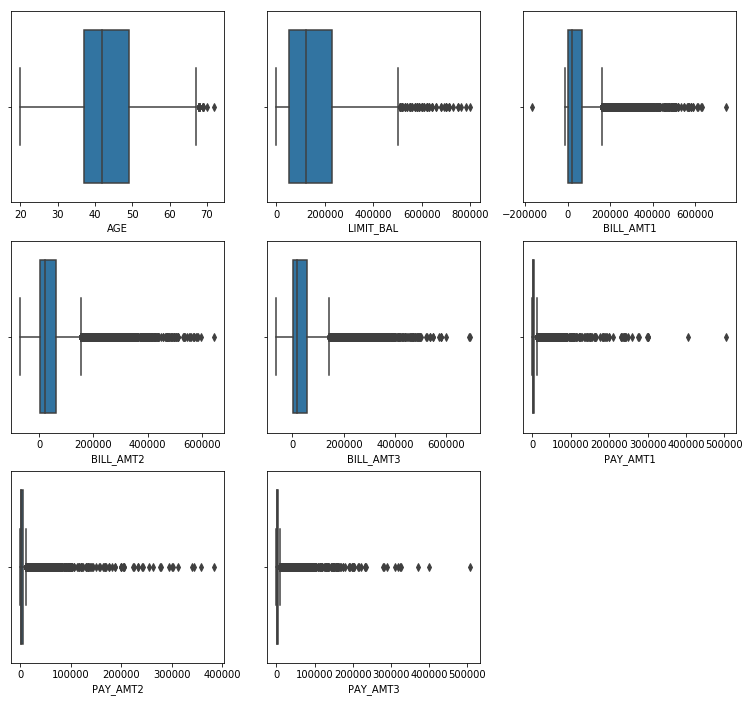

In [8]:
# boxplot numerik
f=plt.figure(figsize=(13,12))

x = 0
for num in numerik :
    x=x+1
    f.add_subplot(3,3,x)
    sns.boxplot(train[num],orient = "h")

In [9]:
# TRANSFORM WITH MIN MAX SCALLER
norm=train[['AGE', 'LIMIT_BAL', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3','PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3']]
min_max_scaler = preprocessing.MinMaxScaler()
np_LIMIT_BAL = min_max_scaler.fit_transform(norm[['LIMIT_BAL']])
np_BILL_AMT1 = min_max_scaler.fit_transform(norm[['BILL_AMT1']])
np_BILL_AMT2 = min_max_scaler.fit_transform(norm[['BILL_AMT2']])
np_BILL_AMT3 = min_max_scaler.fit_transform(norm[['BILL_AMT3']])
np_PAY_AMT1 = min_max_scaler.fit_transform(norm[['PAY_AMT1']])
np_PAY_AMT2 = min_max_scaler.fit_transform(norm[['PAY_AMT2']])
np_PAY_AMT3 = min_max_scaler.fit_transform(norm[['PAY_AMT3']])
norm['LIMIT_BAL'] = pd.DataFrame(np_LIMIT_BAL)
norm['BILL_AMT1'] = pd.DataFrame(np_BILL_AMT1)
norm['BILL_AMT2'] = pd.DataFrame(np_BILL_AMT2)
norm['BILL_AMT3'] = pd.DataFrame(np_LIMIT_BAL)
norm['PAY_AMT1'] = pd.DataFrame(np_PAY_AMT1)
norm['PAY_AMT2'] = pd.DataFrame(np_PAY_AMT2)
norm['PAY_AMT3'] = pd.DataFrame(np_PAY_AMT3)
norm.head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in t

,AGE,LIMIT_BAL,BILL_AMT1,BILL_AMT2,BILL_AMT3,PAY_AMT1,PAY_AMT2,PAY_AMT3
0,40,0.0375,0.208448,0.131474,0.0375,0.003366,0.004156,0.002532
1,41,0.0250,0.200155,0.120370,0.0250,0.000000,0.003377,0.002951
2,36,0.0250,0.200475,0.123337,0.0250,0.003129,0.003551,0.002318
3,35,0.0250,0.183674,0.101494,0.0250,0.002150,0.002597,0.000000
4,38,0.2125,0.369407,0.300012,0.2125,0.036634,0.036360,0.007398


Min max scaller digunakan untuk normalisasi nilai dari 0 sampai 1.

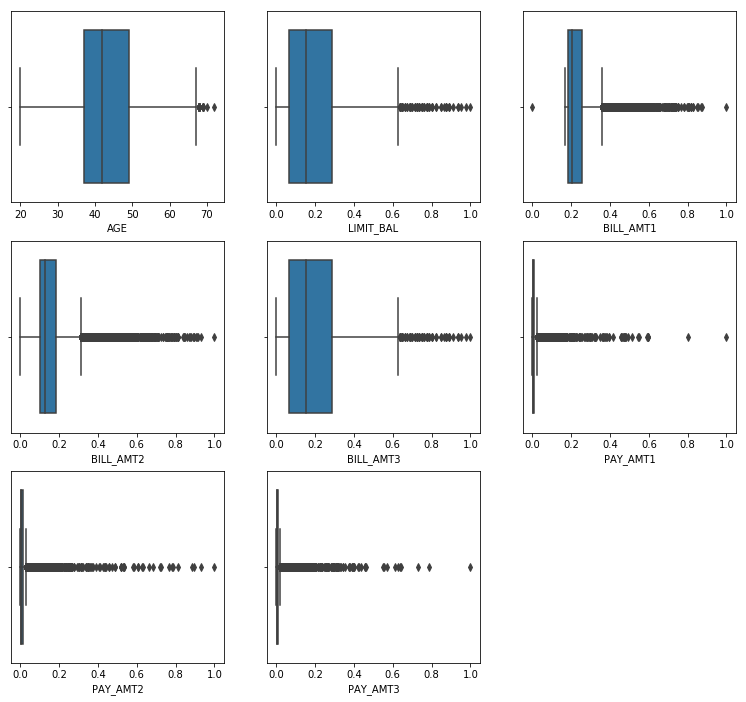

In [10]:
# BOXPLOT AFTER TRANSFORM
f=plt.figure(figsize=(13,12))

x = 0
for num in numerik :
    x=x+1
    f.add_subplot(3,3,x)
    sns.boxplot(norm[num],orient = "h")

Setelah dilakukan tranformasi, ternyata data outlier tetap ada. Maka dari itu nilai outlier ini tidak akan dilakukan normalisasi. Untuk itu, akan digunakan beberapa model algoritma untuk mencari nilai AUC yang paling optimal.

#### HEATMAP UNTUK MENGETAHUI FEATURE YANG PALING MEMENGARUHI TARGET

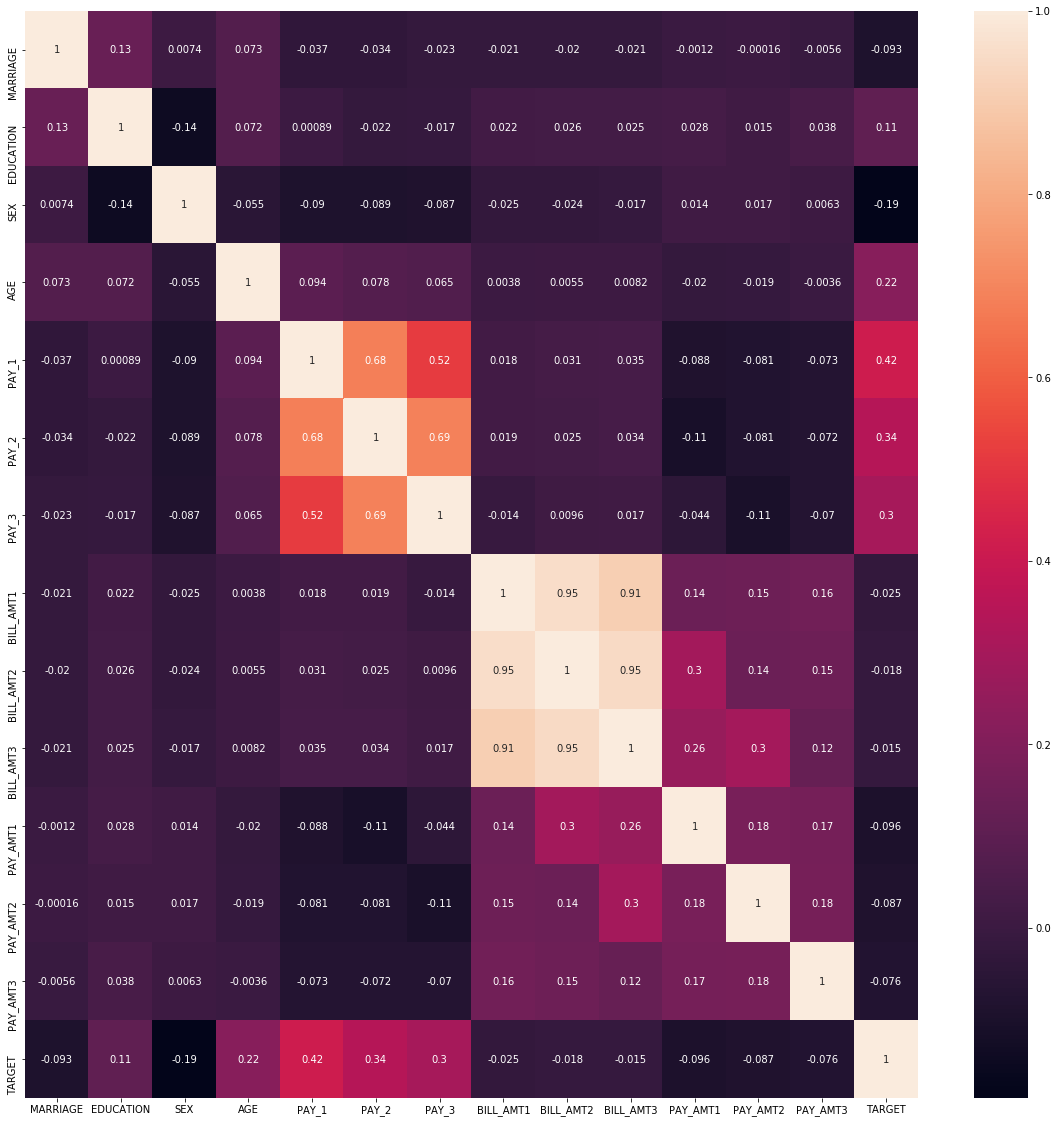

In [11]:
plt.figure(figsize=(20,20))
sns.heatmap(train.iloc[:,1:16].corr(), annot=True)

Apabila dilihat dari heatmap di atas, dapat dilihat bahwa feature yang paling memengaruhi apakah pelanggan berisiko bayar terlambat atau tidak adalah
1. PAY_1
2. PAY_2
3. PAY_3
4. AGE
5. EDUCATION

#### VISUALISASI SETIAP FEATURE

PAY 1, PAY 2, PAY 3

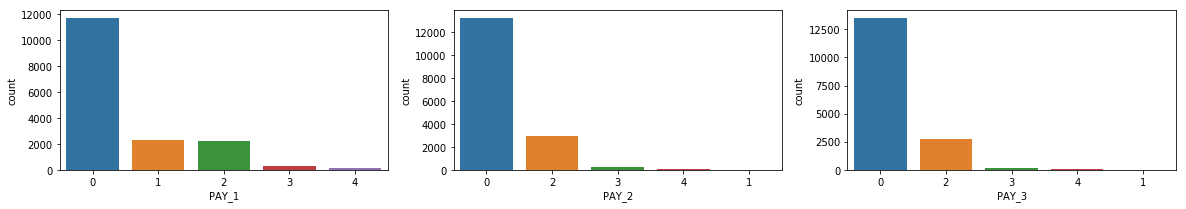

In [12]:
f=plt.figure(figsize=(20,10))
f.add_subplot(3,3,1)
sns.countplot(train['PAY_1'], order = train['PAY_1'].value_counts().index)
f.add_subplot(3,3,2)
sns.countplot(train['PAY_2'], order = train['PAY_2'].value_counts().index)
f.add_subplot(3,3,3)
sns.countplot(train['PAY_3'], order = train['PAY_3'].value_counts().index)

Grafik di atas menunjukkan berapa banyak orang yang melakukan pembayaran tepat waktu dari pembayaran pertama, kedua, dan ketiga.<br>
Terlihat bahwa mayoritas customer membayar tepat waktu (bar warna biru) di setiap pembayarannya.

AGE

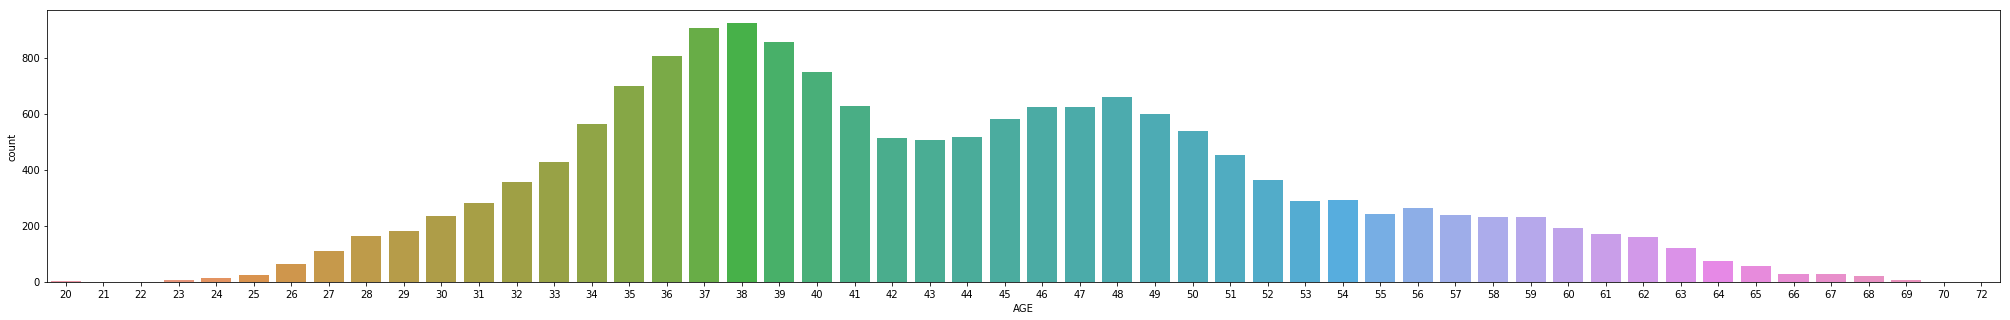

In [13]:
plt.figure(figsize=(35,5))
sns.countplot(train['AGE'])
plt.show()

Distribusi umur customer paling banyak pada range umur 34 - 50

EDUCATION

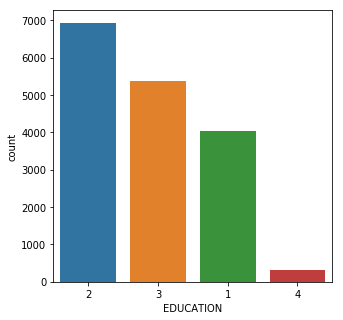

In [14]:
plt.figure(figsize=(5,5))
sns.countplot(train['EDUCATION'], order=train['EDUCATION'].value_counts().index)
plt.show()

SEX

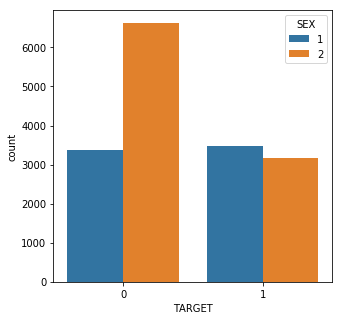

In [15]:
plt.figure(figsize=(5,5))
sns.countplot(data['TARGET'], order=data['TARGET'].value_counts().index, hue=train['SEX'])
plt.show()

Dari data diatas, terlihat bahwa jumlah customer yang terlambat bayar (1) didominasi oleh laki-laki (1).

## MODELLING

##### IMPORT FEATURE IMPORTANCE

In [86]:
X=data[['PAY_1', 'PAY_2', 'PAY_3', 'AGE', 'EDUCATION']]  # Features
y=data['TARGET'] #Target

### 1. RANDOM FOREST

##### IMPORT LIBRARY

In [65]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve
from sklearn import metrics

##### SPLIT DATA TRAIN DAN DATA TEST

In [66]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

##### COMPILE ALGORITHM

In [67]:
clf=RandomForestClassifier(random_state=20) #pick random sample

In [68]:
#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=20, verbose=0, warm_start=False)

##### GET THE RESULT

In [69]:
y_pred=clf.predict(X_test)

##### CONFUSION MATRIX

In [70]:
# untuk ngitung true positive, false positive
confusion_matrix(y_test, y_pred)

array([[2747,  265],
       [ 796, 1180]], dtype=int64)

(true positive, false positive)<br>
(true negative, false negative)

##### ACCURACY

In [71]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy: %.2f" % metrics.accuracy_score(y_test, y_pred))
print("Precission: %.2f" % metrics.precision_score(y_test, y_pred)) #precision : true positive
print("Recall: %.2f" % metrics.recall_score(y_test, y_pred)) #recall : false positive
print("AUC: %.2f" % metrics.roc_auc_score(y_test, y_pred))

Accuracy: 0.79
Precission: 0.82
Recall: 0.60
AUC: 0.75


##### PLOT ROC

In [72]:
# plot AUC
def rocCurve(aClf, X_test, y_test, modelName):
    roc_auc = roc_auc_score(y_test, aClf.predict(X_test))
    fpr, tpr, thresholds = roc_curve(y_test, aClf.predict_proba(X_test)[:,1])
    plt.figure()
    plt.plot(fpr, tpr, color='orange', label='Luas area under curve = %0.2f' % roc_auc)
    plt.plot([0, 1], [0, 1], 'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='lower right')
    plt.show()

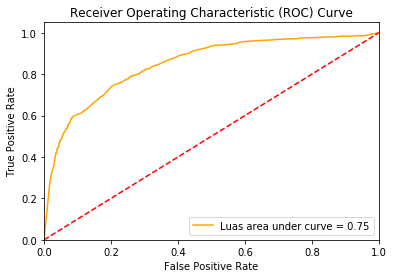

In [73]:
rocCurve(clf, X_test, y_test, modelName = 'Random Forest')

Dari grafik di atas, dapat dilihat bahwa garis ROC berada diatas garis AUC, dimana nilai **AUC sebesar 0,75**. Semakin siku-siku garis ROC maka nilai AUC yang didapatkan akan semakin mendekati 1 (bagus).

##### SVM

In [92]:
from sklearn import svm

In [ ]:
clf = svm.SVC(C=100, kernel='linear') #kernel bisa diganti: linear, radial.
clf.fit(X, y)

In [232]:
y_pred = clf.predict(X_test)
y_pred

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

In [234]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy: %.2f" % metrics.accuracy_score(y_test, y_pred))
print("Precission: %.2f" % metrics.precision_score(y_test, y_pred)) #precision : true positive
print("Recall: %.2f" % metrics.recall_score(y_test, y_pred)) #recall : false positive
print("AUC: %.2f" % metrics.roc_auc_score(y_test, y_pred))

Accuracy: 0.73
Precission: 0.75
Recall: 0.47
AUC: 0.68


In [ ]:
rocCurve(clf, X_test, y_test, modelName = 'Random Forest')

Dari grafik di atas, dapat dilihat bahwa garis ROC berada diatas garis AUC, dimana nilai **AUC sebesar 0.68**.

##### LOGISTIC REGRESSION

In [74]:
from sklearn.linear_model import LogisticRegression

In [75]:
# instantiate the model (using the default parameters)
logreg = LogisticRegression()

# fit the model with data
logreg.fit(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [76]:
y_pred=logreg.predict(X_test)

In [77]:
# untuk ngitung true positive, false positive
confusion_matrix(y_test, y_pred)

array([[2672,  340],
       [ 966, 1010]], dtype=int64)

In [78]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy: %.2f" % metrics.accuracy_score(y_test, y_pred))
print("Precission: %.2f" % metrics.precision_score(y_test, y_pred)) #precision : true positive
print("Recall: %.2f" % metrics.recall_score(y_test, y_pred)) #recall : false positive
print("AUC: %.2f" % metrics.roc_auc_score(y_test, y_pred))

Accuracy: 0.74
Precission: 0.75
Recall: 0.51
AUC: 0.70


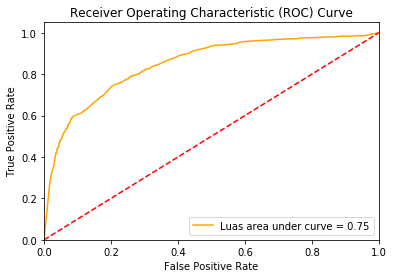

In [79]:
rocCurve(clf, X_test, y_test, modelName = 'LOGISTIC REGRESSION')

Dari grafik di atas, dapat dilihat bahwa garis ROC berada diatas garis AUC, dimana nilai **AUC sebesar 0,7**.

##### DECISION TREE

In [80]:
from sklearn.tree import DecisionTreeClassifier

In [81]:
clf = DecisionTreeClassifier(criterion="entropy", max_depth=5)
clf = clf.fit(X_train,y_train)

In [82]:
y_pred = clf.predict(X_test)

In [83]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy: %.2f" % metrics.accuracy_score(y_test, y_pred))
print("Precission: %.2f" % metrics.precision_score(y_test, y_pred)) #precision : true positive
print("Recall: %.2f" % metrics.recall_score(y_test, y_pred)) #recall : false positive
print("AUC: %.2f" % metrics.roc_auc_score(y_test, y_pred))

Accuracy: 0.79
Precission: 0.80
Recall: 0.64
AUC: 0.76


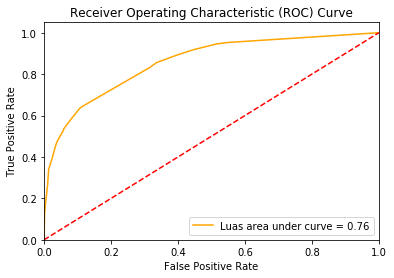

In [84]:
rocCurve(clf, X_test, y_test, modelName = 'DECISION TREE')

Dari grafik di atas, dapat dilihat bahwa garis ROC berada diatas garis AUC, dimana nilai **AUC sebesar 0,76**.

#### MODEL YANG DIPILIH

Dari model yang digunakan, dapat dilihat bahwa **DECISION TREE** memiliki nilai AUC yang paling tinggi : 0,76.

## HASIL TESTING

##### LOAD DATA TESTING

In [85]:
test.head()

,ID,LIMIT_BAL,MARRIAGE,EDUCATION,SEX,AGE,PAY_1,PAY_2,PAY_3,BILL_AMT1,BILL_AMT2,BILL_AMT3,PAY_AMT1,PAY_AMT2,PAY_AMT3
0,1,30000.0,1,1,2,40,0,0,0,24430.0,23881.0,24234.0,1600.0,1287.0,1296.0
1,2,20000.0,1,1,2,41,2,0,0,16474.0,17203.0,18411.0,1300.0,1500.0,824.0
2,3,20000.0,1,1,2,36,0,0,0,18600.0,17947.0,18758.0,1367.0,1178.0,712.0
3,4,20000.0,1,1,2,35,0,0,0,2948.0,3372.0,0.0,1000.0,0.0,0.0
4,5,170000.0,1,1,2,38,0,0,0,145196.0,110163.0,112157.0,13998.0,3760.0,4000.0


In [87]:
clf = DecisionTreeClassifier(criterion="entropy", max_depth=5)
clf = clf.fit(X_train,y_train)

Xtest=test[['PAY_1', 'PAY_2', 'PAY_3', 'AGE', 'EDUCATION']]  # Features

y_pred=clf.predict(Xtest)
y_pred

array([0, 1, 0, ..., 1, 1, 1], dtype=int64)

In [89]:
test['TARGET']=pd.Series(y_pred)
test.head()

,ID,LIMIT_BAL,MARRIAGE,EDUCATION,SEX,AGE,PAY_1,PAY_2,PAY_3,BILL_AMT1,BILL_AMT2,BILL_AMT3,PAY_AMT1,PAY_AMT2,PAY_AMT3,TARGET
0,1,30000.0,1,1,2,40,0,0,0,24430.0,23881.0,24234.0,1600.0,1287.0,1296.0,0
1,2,20000.0,1,1,2,41,2,0,0,16474.0,17203.0,18411.0,1300.0,1500.0,824.0,1
2,3,20000.0,1,1,2,36,0,0,0,18600.0,17947.0,18758.0,1367.0,1178.0,712.0,0
3,4,20000.0,1,1,2,35,0,0,0,2948.0,3372.0,0.0,1000.0,0.0,0.0,0
4,5,170000.0,1,1,2,38,0,0,0,145196.0,110163.0,112157.0,13998.0,3760.0,4000.0,0


In [90]:
test.shape

(16625, 16)

In [91]:
test.to_csv('Hasil testing credit scoring.csv')